In [271]:
import os
import pandas as pd

os.getcwd()

'/home/piai/바탕화면/01 실습파일/1 Big Data 분석 기초'

In [403]:
# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

In [404]:
os.chdir('/home/piai/바탕화면/01 실습파일/1 Big Data 분석 기초')

In [405]:
mycars = pd.read_csv("mycars.csv", encoding = 'euc-kr')
mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


# 실습1 (기술통계)

In [406]:
# 데이터 구성 패키지: Series, DataFrame
import pandas as pd
# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 분석 패키지
from scipy import stats
import scipy.stats

In [407]:
# 1. 시내에서 연비(mpg) 통계치 : 기술통계량   
mycars.describe().round(2)

,displacement,year,cylinder,mpg,highway_mileage
count,234.00,234.00,234.00,234.00,234.00
mean,3.47,2003.50,5.89,16.86,23.44
std,1.29,4.51,1.61,4.26,5.95
min,1.60,1999.00,4.00,9.00,12.00
25%,2.40,1999.00,4.00,14.00,18.00
50%,3.30,2003.50,6.00,17.00,24.00
75%,4.60,2008.00,8.00,19.00,27.00
max,7.00,2008.00,8.00,35.00,44.00


In [408]:
# 2. 고속도로에서 mpg별 통계치 : mpg 데이터 subset
df = mycars[['highway_mileage','mpg']]
df.head()

,highway_mileage,mpg
0,29,18
1,29,21
2,31,20
3,30,21
4,26,16


In [409]:
# 고속도로에서 mpg 기술통계량
df.groupby('highway_mileage').describe()

mpg                                                     
                count       mean       std   min    25%   50%    75%   max
highway_mileage                                                           
12                5.0   9.000000  0.000000   9.0   9.00   9.0   9.00   9.0
14                2.0  11.000000  0.000000  11.0  11.00  11.0  11.00  11.0
15               10.0  11.000000  0.000000  11.0  11.00  11.0  11.00  11.0
16                7.0  11.857143  0.899735  11.0  11.00  12.0  12.50  13.0
17               31.0  13.161290  1.185939  11.0  13.00  13.0  14.00  15.0
18               10.0  12.800000  1.032796  12.0  12.00  12.5  13.00  15.0
19               13.0  14.076923  0.862316  13.0  13.00  14.0  15.00  15.0
20               11.0  15.000000  0.894427  14.0  14.00  15.0  16.00  16.0
21                2.0  15.000000  0.000000  15.0  15.00  15.0  15.00  15.0
22                7.0  15.857143  0.899735  15.0  15.00  16.0  16.50  17.0
23                7.0  16.000000  1.000000  15.0  15.50  16.0  16.00  18.0
24               13.0  16.692308  0.947331  15.0  16.00  17.0  17.00  18.0
25               15.0  17.333333  1.676163  15.0  16.00  17.0  19.00  20.0
26               32.0  18.000000  1.191367  16.0  17.75  18.0  19.00  21.0
27               14.0  19.214286  1.188313  17.0  18.25  19.0  20.00  21.0
28                7.0  19.285714  0.755929  18.0  19.00  19.0  20.00  20.0
29               22.0  20.636364  1.292670  18.0  21.00  21.0  21.00  23.0
30                4.0  22.000000  1.414214  21.0  21.00  21.5  22.50  24.0
31                7.0  21.285714  0.951190  20.0  21.00  21.0  21.50  23.0
32                4.0  24.000000  0.816497  23.0  23.75  24.0  24.25  25.0
33                2.0  26.000000  2.828427  24.0  25.00  26.0  27.00  28.0
34                1.0  26.000000       NaN  26.0  26.00  26.0  26.00  26.0
35                2.0  26.000000  0.000000  26.0  26.00  26.0  26.00  26.0
36                2.0  24.500000  0.707107  24.0  24.25  24.5  24.75  25.0
37                1.0  28.000000       NaN  28.0  28.00  28.0  28.00  28.0
41                1.0  29.000000       NaN  29.0  29.00  29.0  29.00  29.0
44                2.0  34.000000  1.414214  33.0  33.50  34.0  34.50  35.0

# 실습2 (기술통계)

In [410]:
# 구동방식과 모델 데이터 subset
df = mycars[['driving', 'model']]
df.head()

,driving,model
0,f,a4
1,f,a4
2,f,a4
3,f,a4
4,f,a4


In [411]:
# 모델 변수 Count: value_counts(), 순서대로 정렬: .sort_index()
count = df['driving'].value_counts().sort_index()
count

4    103
f    106
r     25
Name: driving, dtype: int64

In [412]:
# CumCnt(cumulative counts) 계산 : cumsum()
cumcnt = np.cumsum(count)
cumcnt

4    103
f    209
r    234
Name: driving, dtype: int64

In [413]:
# Percent 계산: 직접
percent = count / sum(count) * 100
percent

4    44.017094
f    45.299145
r    10.683761
Name: driving, dtype: float64

In [414]:
# CumPct(cumulative percents) 계산: cumsum
cumpct = np.cumsum(percent)
cumpct

4     44.017094
f     89.316239
r    100.000000
Name: driving, dtype: float64

In [415]:
# DataFrame으로 취합
df_count = pd.DataFrame({'Count': count, 
                         'CumCnt': cumcnt, 
                         'Percent': percent,
                         'CumPct': cumpct})
df_count

,Count,CumCnt,Percent,CumPct
4,103,103,44.017094,44.017094
f,106,209,45.299145,89.316239
r,25,234,10.683761,100.000000


In [416]:
# Column의 name(좌측상단 이름) 생성
df_count.columns.name = 'driving'
df_count

driving,Count,CumCnt,Percent,CumPct
4,103,103,44.017094,44.017094
f,106,209,45.299145,89.316239
r,25,234,10.683761,100.000000


In [417]:
# Period 변수 Count: value_count, 순서대로 정렬: sort_index 
count2 = df['model'].value_counts().sort_index()
count2

4runner 4wd                6
a4                         7
a4 quattro                 8
a6 quattro                 3
altima                     6
c1500 suburban 2wd         5
camry                      7
camry solara               7
caravan 2wd               11
civic                      9
corolla                    5
corvette                   5
dakota pickup 4wd          9
durango 4wd                7
expedition 2wd             3
explorer 4wd               6
f150 pickup 4wd            7
forester awd               6
grand cherokee 4wd         8
grand prix                 5
gti                        5
impreza awd                8
jetta                      9
k1500 tahoe 4wd            4
land cruiser wagon 4wd     2
malibu                     5
maxima                     3
mountaineer 4wd            4
mustang                    9
navigator 2wd              3
new beetle                 6
passat                     7
pathfinder 4wd             4
ram 1500 pickup 4wd       10
range rover   

In [418]:
# CumCnt(cumulative counts) 계산 : cumsum
cumcnt2 = np.cumsum(count2)
cumcnt2

4runner 4wd                 6
a4                         13
a4 quattro                 21
a6 quattro                 24
altima                     30
c1500 suburban 2wd         35
camry                      42
camry solara               49
caravan 2wd                60
civic                      69
corolla                    74
corvette                   79
dakota pickup 4wd          88
durango 4wd                95
expedition 2wd             98
explorer 4wd              104
f150 pickup 4wd           111
forester awd              117
grand cherokee 4wd        125
grand prix                130
gti                       135
impreza awd               143
jetta                     152
k1500 tahoe 4wd           156
land cruiser wagon 4wd    158
malibu                    163
maxima                    166
mountaineer 4wd           170
mustang                   179
navigator 2wd             182
new beetle                188
passat                    195
pathfinder 4wd            199
ram 1500 p

In [419]:
# Percent 계산: 직접
percent2 = count2 / sum(count2) * 100
percent2

4runner 4wd               2.564103
a4                        2.991453
a4 quattro                3.418803
a6 quattro                1.282051
altima                    2.564103
c1500 suburban 2wd        2.136752
camry                     2.991453
camry solara              2.991453
caravan 2wd               4.700855
civic                     3.846154
corolla                   2.136752
corvette                  2.136752
dakota pickup 4wd         3.846154
durango 4wd               2.991453
expedition 2wd            1.282051
explorer 4wd              2.564103
f150 pickup 4wd           2.991453
forester awd              2.564103
grand cherokee 4wd        3.418803
grand prix                2.136752
gti                       2.136752
impreza awd               3.418803
jetta                     3.846154
k1500 tahoe 4wd           1.709402
land cruiser wagon 4wd    0.854701
malibu                    2.136752
maxima                    1.282051
mountaineer 4wd           1.709402
mustang             

In [420]:
# CumPct(cumulative percents) 계산: cumsum
cumpct2 = np.cumsum(percent2)
cumpct2

4runner 4wd                 2.564103
a4                          5.555556
a4 quattro                  8.974359
a6 quattro                 10.256410
altima                     12.820513
c1500 suburban 2wd         14.957265
camry                      17.948718
camry solara               20.940171
caravan 2wd                25.641026
civic                      29.487179
corolla                    31.623932
corvette                   33.760684
dakota pickup 4wd          37.606838
durango 4wd                40.598291
expedition 2wd             41.880342
explorer 4wd               44.444444
f150 pickup 4wd            47.435897
forester awd               50.000000
grand cherokee 4wd         53.418803
grand prix                 55.555556
gti                        57.692308
impreza awd                61.111111
jetta                      64.957265
k1500 tahoe 4wd            66.666667
land cruiser wagon 4wd     67.521368
malibu                     69.658120
maxima                     70.940171
m

In [421]:
# DataFrame으로 취합 
df_count2 = pd.DataFrame({'Count': count2,
                          'CumCnt': cumcnt2, 
                          'Percent': percent2,
                          'CumPct': cumpct2})

# Column의 name(좌측상단 이름) 생성 
df_count2.columns.name='model'
df_count2

model,Count,CumCnt,Percent,CumPct
4runner 4wd,6,6,2.564103,2.564103
a4,7,13,2.991453,5.555556
a4 quattro,8,21,3.418803,8.974359
a6 quattro,3,24,1.282051,10.256410
altima,6,30,2.564103,12.820513
c1500 suburban 2wd,5,35,2.136752,14.957265
camry,7,42,2.991453,17.948718
camry solara,7,49,2.991453,20.940171
caravan 2wd,11,60,4.700855,25.641026
civic,9,69,3.846154,29.487179


# 실습3 (정규분포)

In [422]:
# 정규분포에서 누적확률 값 계산
x = 180
mu = 175
sigma = 5

# prob : 135분까지 누적확률값 계산
prob = stats.norm.cdf(x, mu, sigma)

# 135분 이상의 누적확률값 계산
print("{0} cm 이상의 비율 : {1:.1f}%".format(x, (1-prob)*100))

180 cm 이상의 비율 : 15.9%


# 실습4 (정규분포)

In [423]:
# 누적확률 값 계산
x = 15
mu = 12
sigma = 3

# prob1: 9~15 km 이하인 누적확률값 계산
# prob2: 15 km 이하인 누적확률값 계산
prob = stats.norm.cdf(x, mu, sigma)
print(2*(prob - 0.5))
print(1-prob)
print()
print("1) {0} km ~ {1} km 달릴 확률 {2:.1f}%에 해당".format(mu-sigma, x, (2*(prob-0.5))*100))
print("2) {0} km 이상 달릴 확률 {1:.1f}%에 해당".format(x, (1-prob)*100))

0.6826894921370859
0.15865525393145707

1) 9 km ~ 15 km 달릴 확률 68.3%에 해당
2) 15 km 이상 달릴 확률 15.9%에 해당


# 실습5 (t 분포)

In [424]:
# t 분포 확률 계산하기
t = 2.0
df = 100

# 누적확률 값 계산
prob = stats.t.cdf(t, df)
print(" P(T<=t)= {:.1f}%".format(prob*100))

 P(T<=t)= 97.6%


# 실습6 (카이제곱 분포)

In [425]:
# χ2 분포, 확률 계산하기
chisq = 3.0
df = 8

# 누적확률 값 계산
prob = stats.chi2.cdf(chisq, df)
print("χ2 누적확률 계산 : p(X<={0}) = {1:.4f}".format(chisq, prob))

χ2 누적확률 계산 : p(X<=3.0) = 0.0656


# 실습7 (F 분포)

In [426]:
# F 분포, 확률 계산하기
f = 1.5
df_num = 10
df_den = 100

# 누적확률 값 계산
prob = stats.f.cdf(f, df_num, df_den)
print("P(X <= F): {:.3f}".format(prob))

P(X <= F): 0.850


# 실습8 (이항 분포)

In [427]:
# 이항분포에서 확률 계산하기 : pmf(k,n,p) 
n = 5     # n : 5대의 차량 수
p = 0.3    # 공정 불량

for i in range(n+1) :
   # 이항분포 Probability Mass Function
    prob = stats.binom.pmf(k=i, n=n, p=p)  
    print("P(X={0}) = {1:.3f}".format(i, prob))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


# 실습9 (정규성 검정)

In [448]:
import matplotlib
import matplotlib.pyplot as plt

# 가설검정 및 통계 분석 패키지
import scipy.stats as stats
from statsmodels.formula.api import ols

# proportion test 패키지
from statsmodels.stats.proportion import proportions_ztest

# ANOVA 분석 패키지
from statsmodels.stats.anova import anova_lm

In [449]:
# 데이터 가져오기
df = pd.read_csv("2sample_t_test.csv")
df.head()

,Mat_A,Mat_B
0,73.4,68.7
1,77.0,71.4
2,73.7,69.8
3,73.3,75.3
4,73.1,71.3


In [450]:
# 정규성 검정 : Shapiro-Wilk Test
statistic, p = stats.shapiro(df['Mat_A'])

print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic, p))

Shapiro-Wilk Test: statistic=0.906264066696167, p-value=0.2563020884990692


In [451]:
# 정규성 검정 : Shapiro-Wilk Test
statistic, p = stats.shapiro(df['Mat_B'])

print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic, p))

Shapiro-Wilk Test: statistic=0.9729753732681274, p-value=0.9169775247573853


In [452]:
# Mat_A P-value=0.256  > 0.05 : 정규분포 따른다!
# Mat_B P-value=0.916  > 0.05 : 정규분포 따른다!

# 실습10 (모평균 구간추정)

In [453]:
# 데이터 직접입력
df = pd.DataFrame({'wgt':[18, 18, 20, 21, 20, 23, 19, 18, 17, 21, 
                          22, 20, 20, 21, 20, 19, 19, 18, 17, 19]})
df.head()

,wgt
0,18
1,18
2,20
3,21
4,20


In [454]:
# 정규분포 구간 추정 함수 실행 

lower, upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 3.8/np.sqrt(20))
print("신뢰구간: ({0}, {1})" .format(lower.round(2), upper.round(2)))

신뢰구간: ([17.83], [21.17])


# 실습11 (모평균 신뢰구간 추정-모표준편차 모를때)

In [455]:
# df를 직접 입력 
df = pd.DataFrame({'streng': [73, 71, 74, 69, 70, 73, 70, 68, 75, 72, 
                              70, 72, 73, 70, 70, 72, 71, 70, 75, 72]})
df.head()

,streng
0,73
1,71
2,74
3,69
4,70


In [456]:
# t 분포 구간추정 함수 실행 : (loc: 평균의 값, scale: 변동 정도)  
lower, upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale = stats.sem(df))
lower.round(2), upper.round(2)

(array([70.6]), array([72.4]))

# 실습12 (1-Sample t-test)

In [457]:
# df를 직접 입력 
df = pd.DataFrame({'satisfaction': [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 
                                    78.1, 79.2]})
df.head()

,satisfaction
0,85.0
1,79.0
2,79.1
3,79.9
4,81.6


In [458]:
# boxplot
df.boxplot()

<Axes: >

In [459]:
# satisfaction 정규성 검정: Shapiro-Wilk Test
statistic, p = stats.shapiro(df['satisfaction'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.8473217487335205, p-value=0.0539751797914505


In [460]:
# 1-Sample t-test
t_result = stats.ttest_1samp(df, 78.0)

In [461]:
# 1-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), \
       t_result.pvalue.round(3)

In [462]:
# 1-Sample t-test의 t값  p값 출력
print( "1-Sample t-test ")
print( " t 통계량 : {} " .format(t))
print( " p-value : {} " .format(p))

1-Sample t-test 
 t 통계량 : [3.379] 
 p-value : [0.008] 


# 실습13 (2-Sample t-test) 
## : 두 집단 간 평균이 같은지 비교

In [463]:
# Data직접 입력 
df = pd.DataFrame({'A': [1.883, 1.715, 1.799, 1.768, 1.711, 1.832,1.427, 1.344], 
                   'B': [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.800]})
df.head()

,A,B
0,1.883,1.435
1,1.715,1.572
2,1.799,1.486
3,1.768,1.511
4,1.711,1.457


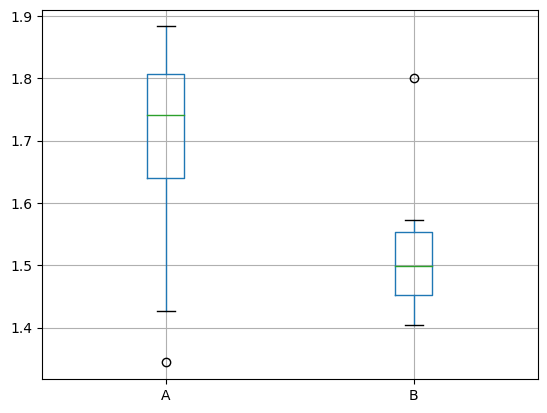

In [466]:
# Group별 boxplot
df.boxplot(['A','B'])
plt.show()

In [467]:
# ‘A‘, ‘B’ 정규성 검정: Shapiro-Wilk Test
statistic, p = stats.shapiro(df['A'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.8425754904747009, p-value=0.08004532009363174


In [468]:
statistic, p = stats.shapiro(df['B'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.8393934369087219, p-value=0.07424874603748322


In [469]:
# 등분산성 검정
stats.bartlett(df['A'], df['B'])

BartlettResult(statistic=1.2899966318541203, pvalue=0.25604857136527204)

In [470]:
# 2-Sample t-test
t_result = stats.ttest_ind(df['A'], df['B'])

# 2-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [471]:
# 2-Sample t-test의 t값 p값 출력
print( "2-Sample t-test ")
print( " t: {} " .format(t))
print( " p: {} " .format(p))

2-Sample t-test 
 t: 1.94 
 p: 0.073 


# 실습14 (Paired t-test)
## : 짝을 이루는 집단의 평균의 차이가 있는지 검정

In [472]:
# df1, df2를 직접 입력 
df1 = pd.DataFrame({'before': [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'after': [710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

# Paired t-test
t_result = stats.ttest_rel(df1, df2)

# Paired t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [473]:
# Paired t-test의 t값 p값 출력
print( "Paired t-test ")
print( " t: {} " .format(t))
print( " p: {} " .format(p))

Paired t-test 
 t: [-2.266] 
 p: [0.05] 


# 실습15 (1 Proportion test) 

In [474]:
# 변수 선언 
count = 40
n_obs = 100
value = 0.5

# Proportion test 실행
z, p = proportions_ztest(count, n_obs, value)

In [475]:
# Proportion test 결과 출력
print( "1 Proportion test ")
print( ' z: {0:0.3f}' .format(z))
print( ' p: {0:0.3f}'.format(p))

1 Proportion test 
 z: -2.041
 p: 0.041


# 실습16 (2 Proportion test) 

In [476]:
# 변수 선언 
count = np.array([14, 5])
nobs = np.array([1200, 1200])

# Proportion test 실행
z, p = proportions_ztest(count, nobs)

In [477]:
# Proportion test 결과 출력
print( "2 Proportion test ")
print( ' z: {0:0.3f}' .format(z))
print( ' p: {0:0.3f}'.format(p))

2 Proportion test 
 z: 2.073
 p: 0.038


# 실습17 (카이제곱 검정, chi-square test) 

In [478]:
# df 생성  
df = pd.DataFrame({'A': [18, 1, 8, 7, 10, 9, 10], 
                   'B': [8, 2, 14, 5, 5, 9, 4], 
                   'C': [4, 1, 3, 4, 9, 5, 4],
                   'D': [4, 1, 2, 3, 2, 7, 3],
                   'E': [3, 1, 3, 1, 1, 1, 1],
                   'F': [3, 25, 8, 10, 2, 1, 7]})

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print( ' expected value: \n{}' .format(expected.round(3)))

chi-square test 
 chisq: 98.274
 p: 0.000
 degree of freedom: 30
 expected value: 
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


# 실습18 (ANOVA) 

In [510]:
# df 입력
df = pd.read_csv("ANOVA.csv", encoding = 'euc-kr')
df.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


In [519]:
print(df)

    time charge gangjong type
0   32.2      A        a    a
1   30.4      B        a    a
2   33.6      C        a    a
3   36.4      D        a    a
4   33.9      E        a    a
5   34.9      F        a    a
6   33.1      A        b    a
7   29.9      B        b    a
8   31.7      C        b    a
9   27.5      D        b    a
10  34.0      E        b    a
11  30.7      F        b    a
12  32.6      A        c    b
13  32.7      B        c    b
14  29.3      C        c    b
15  25.9      D        c    b
16  31.1      E        c    b
17  23.8      F        c    b
18  26.7      A        d    b
19  28.5      B        d    b
20  30.9      C        d    b
21  26.2      D        d    b
22  32.3      E        d    b
23  23.7      F        d    b


In [521]:
print(df.dtypes)

time        float64
charge       object
gangjong     object
type         object
dtype: object


In [522]:
df['gangjong'] = df['gangjong'].astype('category')
df['type'] = df['type'].astype('category')

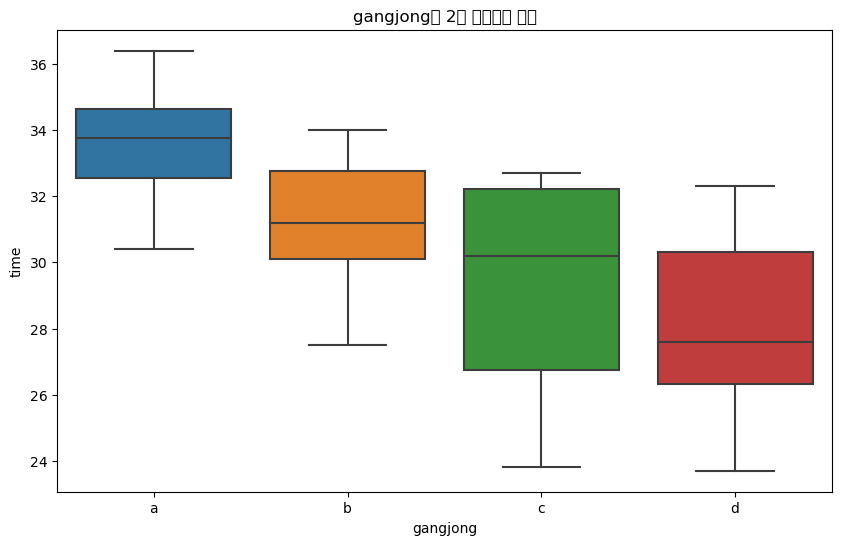

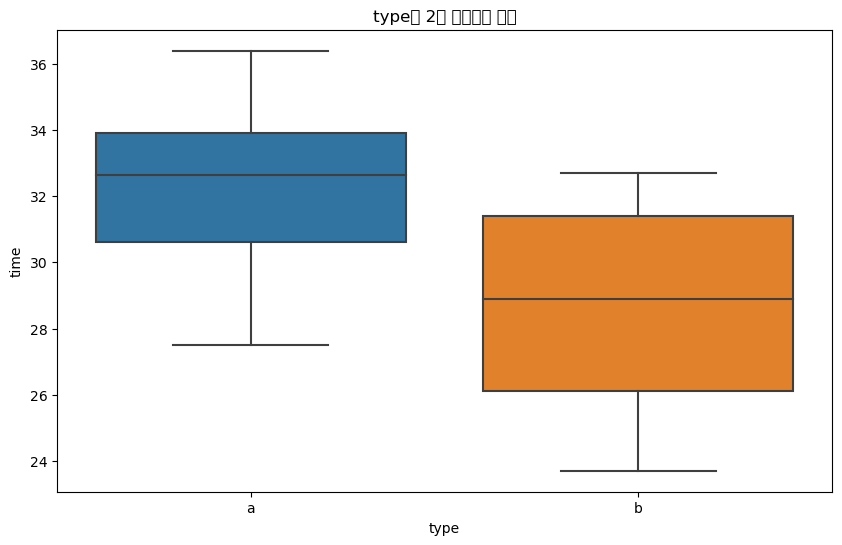

In [523]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='gangjong', y='time', data=df)
plt.title('gangjong별 2차 정련시간 분포')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='time', data=df)
plt.title('type별 2차 정련시간 분포')
plt.show()

# # Group별 boxplot 
# df.boxplot(['gangjong','type'])
# plt.show()

In [584]:
df['gangjong']

0     a
1     a
2     a
3     a
4     a
5     a
6     b
7     b
8     b
9     b
10    b
11    b
12    c
13    c
14    c
15    c
16    c
17    c
18    d
19    d
20    d
21    d
22    d
23    d
Name: gangjong, dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [580]:
df['type']

0     a
1     a
2     a
3     a
4     a
5     a
6     a
7     a
8     a
9     a
10    a
11    a
12    b
13    b
14    b
15    b
16    b
17    b
18    b
19    b
20    b
21    b
22    b
23    b
Name: type, dtype: category
Categories (2, object): ['a', 'b']

In [585]:
# 강종별 정규성 검정
# for category in df['gangjong'].unique():
#     group_data = df[df['gangjong'] == category]['time']
#     stat, p = shapiro(group_data)
#     print(f"{category} 그룹 → p-value = {p:.4f}")

# # 'gangjong‘. ’type’ 정규성 검정: Shapiro-Wilk Test
# f, p = stats.shapiro(df['gangjong'])
# print("statistic={}, p-value={}".format(f,p))

In [598]:
from scipy.stats import shapiro

# 강종별 정규성 검정
for category in df['gangjong'].unique():
    gangjong_groups = df[df['gangjong'] == category]['time']
    f, p = stats.shapiro(gangjong_groups)
    print("statistic={}, p-value={}".format(f,p))

statistic=0.9879403114318848, p-value=0.983557939529419
statistic=0.9769707918167114, p-value=0.9355478286743164
statistic=0.8929420113563538, p-value=0.3338908553123474
statistic=0.9713904857635498, p-value=0.901641845703125


In [599]:
from scipy.stats import shapiro

# 타입별 정규성 검정
for category in df['type'].unique():
    type_groups = df[df['type'] == category]['time']
    f, p = stats.shapiro(type_groups)
    print("statistic={}, p-value={}".format(f,p))

statistic=0.982139527797699, p-value=0.9907686114311218
statistic=0.9098271131515503, p-value=0.2122616022825241


In [600]:
# 'A‘. ’B’, ’C’ ,'D’ 등분산성 검정: bartlett Test
import pandas as pd
from scipy import stats

# gangjong별 그룹 리스트 생성
gangjong_groups = [df[df['gangjong'] == group]['time'] for group in df['gangjong'].unique()]

# Bartlett's test (등분산 검정) 수행
bartlett_stat, bartlett_p_val = stats.bartlett(*gangjong_groups)

# 결과 출력
print(f"Bartlett's test: Statistic = {bartlett_stat}, p-value = {bartlett_p_val}")

Bartlett's test: Statistic = 1.8729084232387967, p-value = 0.5991991808067023


In [601]:
# 'A‘. ’B’ 등분산성 검정: bartlett Test
import pandas as pd
from scipy import stats

# type별 그룹 리스트 생성
type_groups = [df[df['type'] == group]['time'] for group in df['type'].unique()]

# Bartlett's test (등분산 검정) 수행
bartlett_stat_type, bartlett_p_val_type = stats.bartlett(*type_groups)

# 결과 출력
print(f"Bartlett's test (type에 대한): Statistic = {bartlett_stat_type}, p-value = {bartlett_p_val_type}")


Bartlett's test (type에 대한): Statistic = 0.9529700642151171, p-value = 0.3289644435379069


In [605]:
f_result = stats.f_oneway(*gangjong_groups)  # gangjong에 대한 ANOVA
f_result_type = stats.f_oneway(*type_groups)  # type에 대한 ANOVA

# gangjong에 대한 ANOVA 결과
f_gangjong, p_gangjong = round(f_result.statistic, 3), round(f_result.pvalue, 3)

# type에 대한 ANOVA 결과
f_type, p_type = round(f_result_type.statistic, 3), round(f_result_type.pvalue, 3)

print(f"gangjong에 대한 ANOVA 결과: F = {f_gangjong}, p-value = {p_gangjong}")
print(f"type에 대한 ANOVA 결과: F = {f_type}, p-value = {p_type}")

gangjong에 대한 ANOVA 결과: F = 4.172, p-value = 0.019
type에 대한 ANOVA 결과: F = 9.654, p-value = 0.005


# 실습19 (Correlation Analysis) 

In [575]:
# df 생성  
df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 
       36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1,
       39, 36.9, 36.8, 37.6, 33, 33.5]
df2 = [14, 15, 14, 16, 17, 14, 17, 16, 
       15, 16, 14, 16, 18, 13, 15, 17, 
       14, 16, 20, 21]

# Correlation Analysis 실행
corr, pval = stats.pearsonr(df1, df2)

# Correlation, p-value 결과 출력 
print( "Correlation Analysis ")
print( ' corr: {0:0.3f}' .format(corr))
print( ' p-value : {0:0.3f}'.format(pval))

Correlation Analysis 
 corr: -0.723
 p-value : 0.000
